In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
dataset = pd.read_csv('customer_segmentation.csv')
dataset.head()
#dataset.shape
#dataset.columns
#dataset.info()
#dataset.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [90]:
#dataset['Income'] = dataset['Income'].fillna(dataset['Income'].mean()) - fills the mean for missing value
#dataset = dataset.fillna(dataset.mean(numeric_only=True)) ## Both have same function

dataset.dropna(inplace = True) #Drops the empty rows 
dataset.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [91]:
#dataset['Dt_Customer'].dtype
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'], dayfirst = True) #used to change the dataset from object to Datetime dtype
dataset['Dt_Customer'].dtype

dtype('<M8[ns]')

In [92]:
#used to create a new column
dataset['Age'] = 2025 - dataset['Year_Birth'] 
dataset['Total_Children'] = dataset['Kidhome'] + dataset['Teenhome']

#Rename the column_name
#dataset.rename(columns={'Income': 'Revenue'}, inplace=True)
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

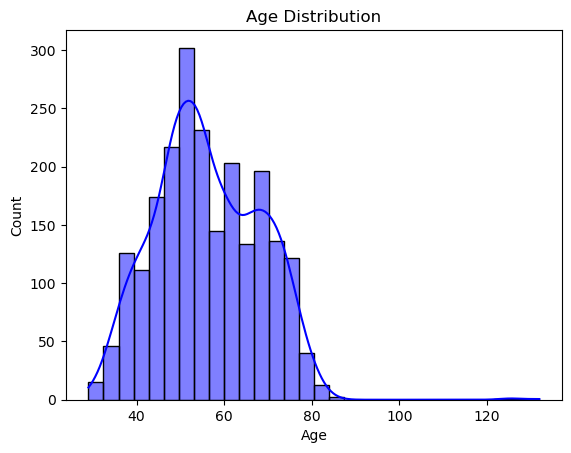

In [93]:
sns.histplot(dataset['Age'], bins = 30, kde = True, color='blue')
plt.title('Age Distribution')
plt.show()

In [98]:
#Declaring 2 variables and store limited columns and concatenate these 2 variables into 1

pt1 = dataset[['Income', 'Age', 'Recency']]
pt2 = dataset[['NumWebPurchases', 'NumStorePurchases']]
corr = pd.concat([pt1,pt2], axis = 1)
corr_matrix = corr.corr()
corr_matrix

,Income,Age,Recency,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,-0.005641,-0.000434
NumWebPurchases,0.387878,0.153051,-0.005641,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.516240,1.000000


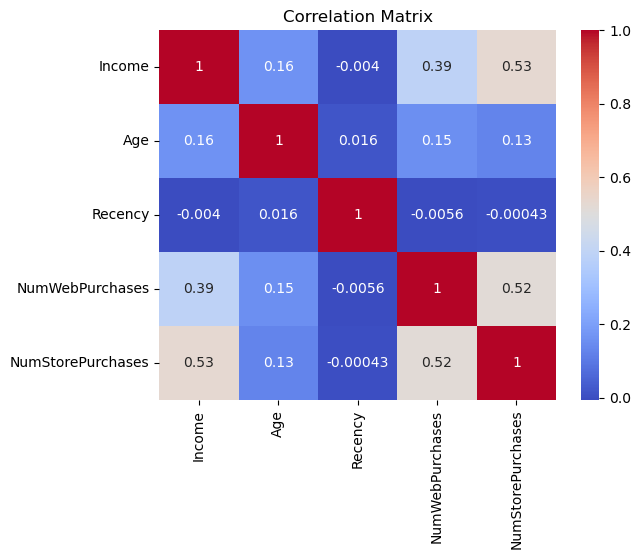

In [97]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [107]:
dataset['Total_Spending'] = dataset[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 
     'MntFishProducts', 'MntSweetProducts', 
     'MntGoldProds', 'NumDealsPurchases']
].sum(axis=1)

#dataset['Total_Spending'].head()
group1 = dataset.groupby('Education')['Total_Spending'].sum().sort_values(ascending=False)
group1

Education
Graduation    696382
PhD           326644
Master        223450
2n Cycle       99438
Basic           4514
Name: Total_Spending, dtype: int64

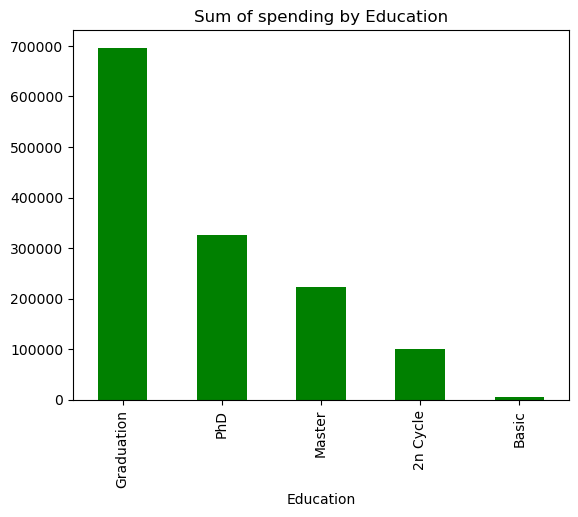

In [108]:
group1.plot(kind='bar', color = 'green')
plt.title('Sum of spending by Education')
plt.show()

In [114]:
features = ['Age', 'Income', 'Total_Spending','NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
x = dataset[features].copy()
x.head(2)

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1620,8,4,7,58
1,71,46344.0,29,1,2,5,38


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67695423, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96309259, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.27811107, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.04971494, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39094776, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.72082557, ..., -0.55414289,
         0.69323197, -0.31140528]])

In [117]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

from sklearn.cluster import KMeans
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[10218.085741927325,
 9007.680700078337,
 8242.573568699643,
 7987.674310781867,
 7162.903516461735,
 6735.068028059253,
 6163.281017209079,
 6185.667934949422]

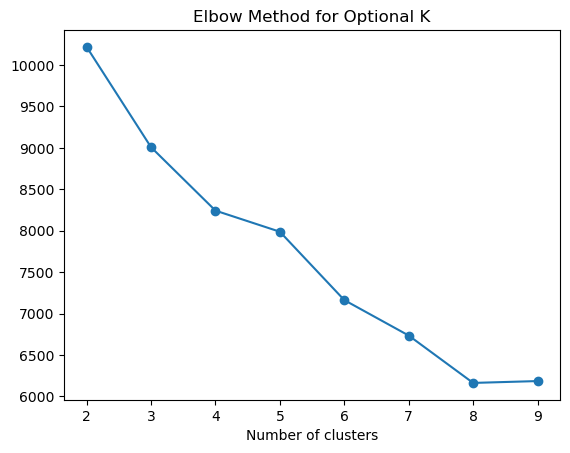

In [119]:
plt.plot(range(2,10),wcss,marker='o')
plt.title('Elbow Method for Optional K')
plt.xlabel('Number of clusters')
plt.show()

In [124]:
kmeans = KMeans(n_clusters = 6)
dataset['Cluster'] = kmeans.fit_predict(x_scaled)
#dataset['Cluster']

cluster_summary = dataset.groupby('Cluster')[features].mean()
#cluster_summary
dataset['Cluster'].value_counts()

Cluster
4    465
2    416
0    396
1    332
5    324
3    283
Name: count, dtype: int64

In [126]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(x_scaled)
dataset['PCA1'], dataset['PCA2'] = pca_data[:,0], pca_data[:,1]

pca_data

array([[ 1.10877149, -0.21293256],
       [-1.33739544,  0.27225191],
       [ 1.88140967, -1.01335235],
       ...,
       [ 1.15259629,  1.14840385],
       [ 1.88745063, -1.15848115],
       [-0.84122115, -0.15814082]])

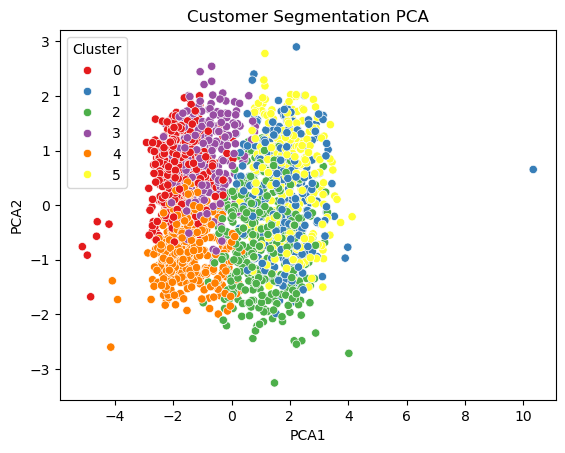

In [127]:
sns.scatterplot(x='PCA1', y='PCA2', hue = 'Cluster', data = dataset, palette = 'Set1')
plt.title('Customer Segmentation PCA')
plt.show()